In [ ]:
!pip install minisom




In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from minisom import MiniSom
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.feature_selection import SelectKBest, mutual_info_classif, VarianceThreshold
from sklearn.neighbors import KNeighborsClassifier




In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
from pylab import bone, pcolor, colorbar, plot, show

In [ ]:
data = pd.read_csv('MCSDatasetNEXTCONLab.csv')

In [ ]:
data.head()

,ID,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber,Ligitimacy
0,1,45.442142,-75.303369,1,4,13,40,40,9,91,0,131380,1
1,1,45.442154,-75.304366,1,4,23,40,30,9,91,0,131380,1
2,1,45.442104,-75.303963,1,4,33,40,20,9,91,0,121996,1
3,1,45.441868,-75.303577,1,4,43,40,10,9,91,0,121996,1
4,2,45.447727,-75.147722,2,15,49,30,30,5,47,0,140784,1


In [ ]:
# Split the dataset into training and test based on the day
train_data = data[data['Day'].isin([0, 1, 2])]
test_data = data[data['Day'] == 3]
# Remove ID and Day features from the datasets
train_data = train_data.drop(['ID', 'Day'], axis=1)
test_data = test_data.drop(['ID', 'Day'], axis=1)

In [ ]:
x_train = train_data.drop('Ligitimacy', axis=1)
y_train = train_data['Ligitimacy']
x_test= test_data.drop('Ligitimacy', axis=1)
y_test= test_data['Ligitimacy']

In [ ]:
# applay Naive Bayes Classifier and calculate confusion matrix and f-score
gnb_classifier = GaussianNB()
gnb_classifier.fit(x_train, y_train)

gnb_predictions = gnb_classifier.predict(x_test)
gnb_confusion_matrix = confusion_matrix(y_test, gnb_predictions)
gnb_f1_score = f1_score(y_test, gnb_predictions)


# applay K-Nearest Neighbor Classifier and calculate confusion matrix and f-score
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(x_train, y_train)

knn_predictions = knn_classifier.predict(x_test)
knn_confusion_matrix = confusion_matrix(y_test, knn_predictions)
knn_f1_score = f1_score(y_test, knn_predictions)

#print results
print('Naive Bayes Classifier Confusion Matrix:')
print(gnb_confusion_matrix)
print('Naive Bayes Classifier F1 Score:', gnb_f1_score)

print('K-Nearest Neighbor Classifier Confusion Matrix:')
print(knn_confusion_matrix)
print('K-Nearest Neighbor Classifier F1 Score:', knn_f1_score)

Naive Bayes Classifier Confusion Matrix:
[[   0  312]
 [   0 2148]]
Naive Bayes Classifier F1 Score: 0.9322916666666667
K-Nearest Neighbor Classifier Confusion Matrix:
[[ 138  174]
 [ 159 1989]]
K-Nearest Neighbor Classifier F1 Score: 0.9227557411273487


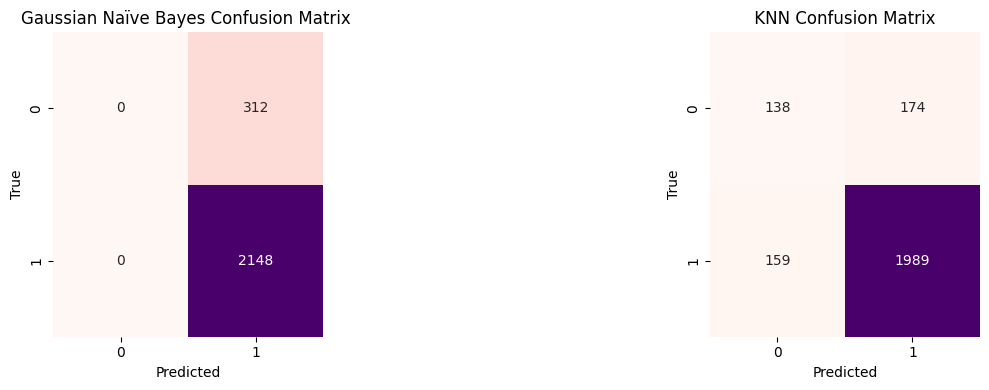

In [ ]:
# Plot confusion matrices
plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
sns.heatmap(gnb_confusion_matrix, annot=True, cmap="RdPu", fmt="d", cbar=False)
plt.title("Gaussian Naïve Bayes Confusion Matrix ")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.subplot(1, 3, 3)
sns.heatmap(knn_confusion_matrix, annot=True, cmap="RdPu", fmt="d", cbar=False)
plt.title(" KNN Confusion Matrix ")
plt.xlabel("Predicted")
plt.ylabel("True")



plt.tight_layout()
plt.show()

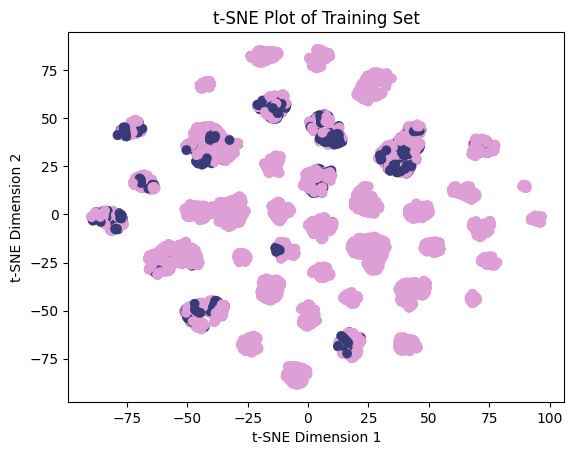

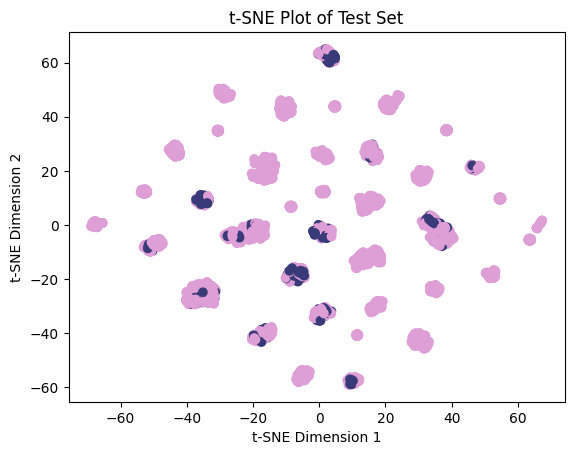

In [ ]:
#tsne
# Perform t-SNE on the training and test sets
tsne = TSNE(n_components=2, random_state=42)
#train
train_tsne = tsne.fit_transform(x_train)
# Create a scatter plot of the training set
plt.scatter(train_tsne[:, 0], train_tsne[:, 1], c=y_train, cmap='tab20b')
plt.title('t-SNE Plot of Training Set')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

#test
test_tsne = tsne.fit_transform(x_test)
# Create a scatter plot of the test set
plt.scatter(test_tsne[:, 0], test_tsne[:, 1], c=y_test, cmap='tab20b')
plt.title('t-SNE Plot of Test Set')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [ ]:
# Scale the input data
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
# PCA dimensionality reduction
pca_f1_scores_nb = []
pca_f1_scores_knn = []
dimensions = [2,3,4 ,5,6, 7,8,9]
for n_components in dimensions:
    # Apply PCA
    pca = PCA(n_components=n_components, random_state=0)
    train_pca = pca.fit_transform(x_train_scaled)
    test_pca = pca.transform(x_test_scaled)

    # Train Naive Bayes classifier
    nb_classifier = GaussianNB()
    nb_classifier.fit(train_pca, y_train)
    nb_predictions = nb_classifier.predict(test_pca)
    pca_f1_scores_nb.append(f1_score(y_test, nb_predictions))

    # Train K-Nearest Neighbors classifier
    knn_classifier = KNeighborsClassifier()
    knn_classifier.fit(train_pca, y_train)
    knn_predictions = knn_classifier.predict(test_pca)
    pca_f1_scores_knn.append(f1_score(y_test, knn_predictions))
  # Print F1 scores for NB and KNN classifiers
for i in range(len(dimensions)):
    print(f"F1 Score (NB) for dimensionality {dimensions[i]}: {pca_f1_scores_nb[i]}")
    print(f"F1 Score (KNN) for dimensionality {dimensions[i]}: {pca_f1_scores_knn[i]}")

#print
# Find the best performance for NB classifier
best_index_nb = np.argmax(pca_f1_scores_nb)
best_dimension_nb = dimensions[best_index_nb]
best_f1_score_nb = pca_f1_scores_nb[best_index_nb]

# Find the best performance for KNN classifier
best_index_knn = np.argmax(pca_f1_scores_knn)
best_dimension_knn = dimensions[best_index_knn]
best_f1_score_knn = pca_f1_scores_knn[best_index_knn]

# Print the best performance for NB classifier
print(f"The best performance for Naive Bayes (NB) classifier:")
print(f"Dimensionality: {best_dimension_nb}")
print(f"F1 Score: {best_f1_score_nb}")

# Print the best performance for KNN classifier
print(f"The best performance for K-Nearest Neighbors (KNN) classifier:")
print(f"Dimensionality: {best_dimension_knn}")
print(f"F1 Score: {best_f1_score_knn}")

F1 Score (NB) for dimensionality 2: 0.9117785077428437
F1 Score (KNN) for dimensionality 2: 0.9165332723530757
F1 Score (NB) for dimensionality 3: 0.9102443609022556
F1 Score (KNN) for dimensionality 3: 0.9297396913153652
F1 Score (NB) for dimensionality 4: 0.9230769230769231
F1 Score (KNN) for dimensionality 4: 0.9268516395322174
F1 Score (NB) for dimensionality 5: 0.923611111111111
F1 Score (KNN) for dimensionality 5: 0.9254004576659041
F1 Score (NB) for dimensionality 6: 0.9237896687514477
F1 Score (KNN) for dimensionality 6: 0.9130832570905764
F1 Score (NB) for dimensionality 7: 0.9153018249883014
F1 Score (KNN) for dimensionality 7: 0.9155413138017853
F1 Score (NB) for dimensionality 8: 0.9174440298507464
F1 Score (KNN) for dimensionality 8: 0.9158576051779935
F1 Score (NB) for dimensionality 9: 0.9180251513740103
F1 Score (KNN) for dimensionality 9: 0.9204597701149425
The best performance for Naive Bayes (NB) classifier:
Dimensionality: 6
F1 Score: 0.9237896687514477
The best per

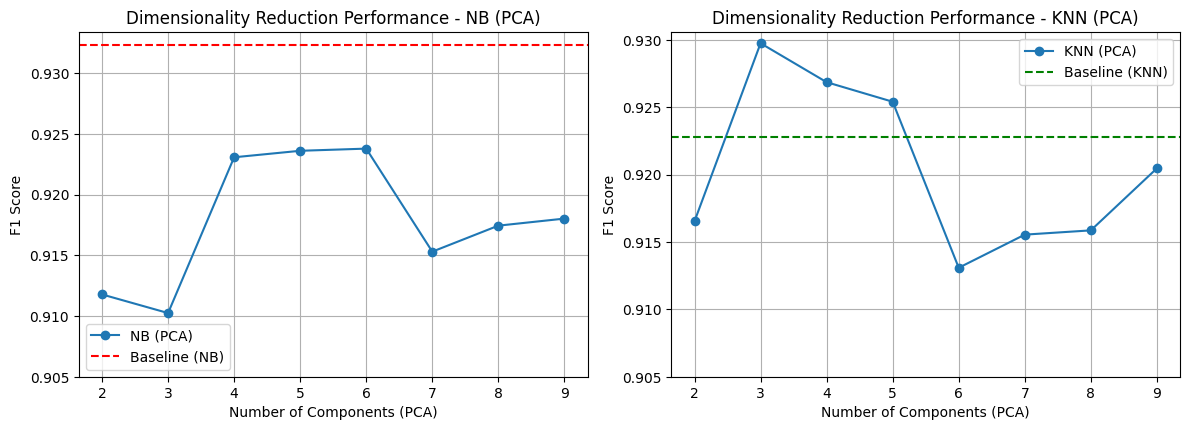

In [ ]:
import matplotlib.pyplot as plt

# Baseline performances
baseline_f1_nb = gnb_f1_score  # F1 score of NB classifier in the baseline
baseline_f1_knn =knn_f1_score  # F1 score of KNN classifier in the baseline

# Plotting
plt.figure(figsize=(12, 8))

# Plot for NB classifier - PCA
plt.subplot(2, 2, 1)
plt.plot(dimensions, pca_f1_scores_nb, marker='o', label='NB (PCA)')
plt.axhline(y=baseline_f1_nb, color='r', linestyle='--', label='Baseline (NB)')
plt.xlabel('Number of Components (PCA)')
plt.ylabel('F1 Score')
plt.title('Dimensionality Reduction Performance - NB (PCA)')
plt.ylim(0.905, )
plt.legend()
plt.grid(True)

# Plot for KNN classifier - PCA
plt.subplot(2, 2, 2)
plt.plot(dimensions, pca_f1_scores_knn, marker='o', label='KNN (PCA)')
plt.axhline(y=baseline_f1_knn, color='g', linestyle='--', label='Baseline (KNN)')
plt.xlabel('Number of Components (PCA)')
plt.ylabel('F1 Score')
plt.title('Dimensionality Reduction Performance - KNN (PCA)')
plt.ylim(0.905, )
plt.legend()
plt.grid(True)






plt.tight_layout()
plt.show()

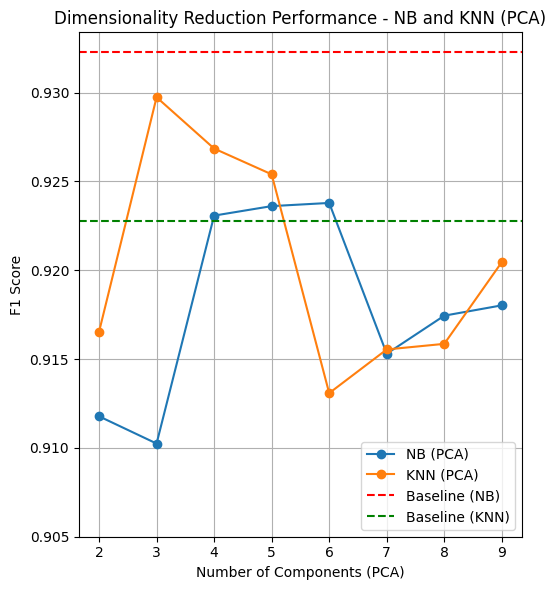

In [ ]:
import matplotlib.pyplot as plt

# Baseline performances
baseline_f1_nb = gnb_f1_score  # F1 score of NB classifier in the baseline
baseline_f1_knn = knn_f1_score  # F1 score of KNN classifier in the baseline

# Plotting
plt.figure(figsize=(10, 6))

# Plot for NB classifier - PCA and KNN classifier - PCA
plt.subplot(1, 2, 1)
plt.plot(dimensions, pca_f1_scores_nb, marker='o', label='NB (PCA)')
plt.plot(dimensions, pca_f1_scores_knn, marker='o', label='KNN (PCA)')
plt.axhline(y=baseline_f1_nb, color='r', linestyle='--', label='Baseline (NB)')
plt.axhline(y=baseline_f1_knn, color='g', linestyle='--', label='Baseline (KNN)')
plt.xlabel('Number of Components (PCA)')
plt.ylabel('F1 Score')
plt.title('Dimensionality Reduction Performance - NB and KNN (PCA)')
plt.ylim(0.905, )
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()

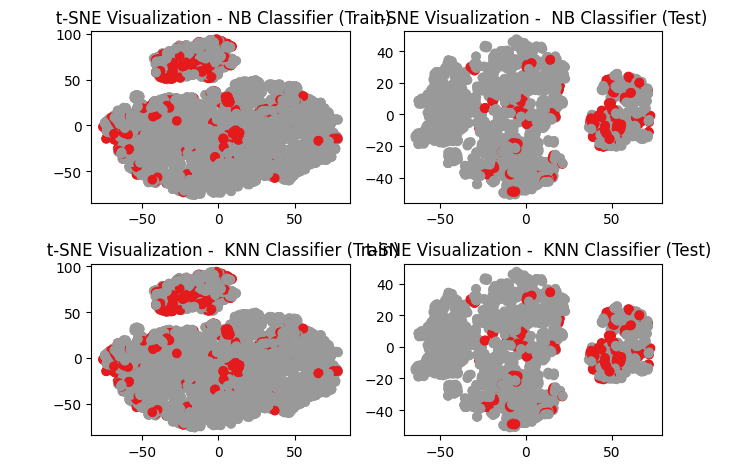

Best performance for Naive Bayes (NB) classifier:
Dimensionality: 6
F1 Score: 0.9237896687514477
Best performance for K-Nearest Neighbors (KNN) classifier:
Dimensionality: 3
F1 Score: 0.9297396913153652


In [ ]:
#plot tsne for the best performance in knn and nb for both train and test for pca
from sklearn.manifold import TSNE

# Apply t-SNE on the best performing dimensionality for train and test data
tsne = TSNE(n_components=2, random_state=0)
best_train_features = pca.transform(x_train_scaled)
best_test_features = pca.transform(x_test_scaled)

# Reduce dimensionality with t-SNE for train and test data
tsne_train_features = tsne.fit_transform(best_train_features)
tsne_test_features = tsne.fit_transform(best_test_features)

# Plot t-SNE visualization for NB classifier on train data
plt.subplot(2, 2, 1)
plt.scatter(tsne_train_features[:, 0], tsne_train_features[:, 1], c=y_train, cmap='Set1')
plt.title('       t-SNE Visualization - NB Classifier (Train)      ')

# Plot t-SNE visualization for NB classifier on test data
plt.subplot(2, 2, 2)
plt.scatter(tsne_test_features[:, 0], tsne_test_features[:, 1], c=y_test, cmap='Set1')
plt.title('       t-SNE Visualization -  NB Classifier (Test)    ')

# Plot t-SNE visualization for KNN classifier on train data
plt.subplot(2, 2, 3)
plt.scatter(tsne_train_features[:, 0], tsne_train_features[:, 1], c=y_train, cmap='Set1')
plt.title('       t-SNE Visualization -  KNN Classifier (Train)      ')

# Plot t-SNE visualization for KNN classifier on test data
plt.subplot(2, 2, 4)
plt.scatter(tsne_test_features[:, 0], tsne_test_features[:, 1], c=y_test, cmap='Set1')
plt.title('       t-SNE Visualization -  KNN Classifier (Test)     ')

plt.tight_layout()
plt.show()
# Print the best performance for NB classifier
print("Best performance for Naive Bayes (NB) classifier:")
print("Dimensionality:", best_dimension_nb)
print("F1 Score:", best_f1_score_nb)

# Print the best performance for KNN classifier
print("Best performance for K-Nearest Neighbors (KNN) classifier:")
print("Dimensionality:", best_dimension_knn)
print("F1 Score:", best_f1_score_knn)

F1 Score (NB) for dimensionality 10: 0.8985714285714286
F1 Score (KNN) for dimensionality 10: 0.9183626800823234
F1 Score (NB) for dimensionality 9: 0.9034400948991697
F1 Score (KNN) for dimensionality 9: 0.9146005509641874
F1 Score (NB) for dimensionality 8: 0.8972586412395709
F1 Score (KNN) for dimensionality 8: 0.9273182957393483
F1 Score (NB) for dimensionality 7: 0.8962219033955044
F1 Score (KNN) for dimensionality 7: 0.9200913242009132
F1 Score (NB) for dimensionality 6: 0.8944457802356336
F1 Score (KNN) for dimensionality 6: 0.9193511537582819
F1 Score (NB) for dimensionality 5: 0.8895320791123975
F1 Score (KNN) for dimensionality 5: 0.920172845121674
F1 Score (NB) for dimensionality 4: 0.8060413354531001
F1 Score (KNN) for dimensionality 4: 0.9185185185185186
F1 Score (NB) for dimensionality 3: 0.8462311557788944
F1 Score (KNN) for dimensionality 3: 0.9148550724637681
F1 Score (NB) for dimensionality 2: 0.8040201005025125
F1 Score (KNN) for dimensionality 2: 0.9215077605321508


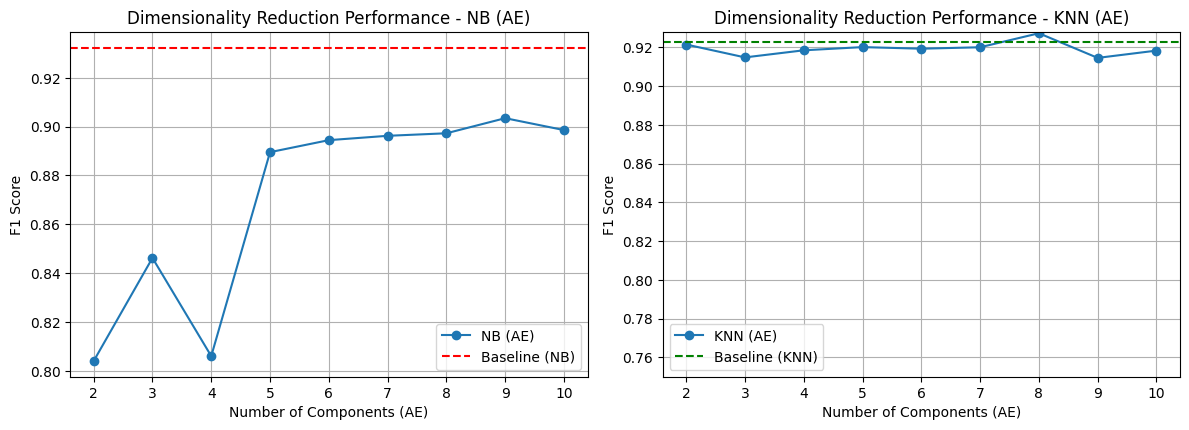

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor

ae_f1_scores_nb = []
ae_f1_scores_knn = []
dimension = list(range(10, 1, -1))

scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

# Initialize classifiers
GNB = GaussianNB()
KNN = KNeighborsClassifier()

for n in dimension:
    # AE
    autoencoder = MLPRegressor(hidden_layer_sizes=[n], activation='relu', solver='adam',max_iter=1000, random_state=0)
    autoencoder.fit(X_train, X_train)

    # Reduce dimensionality with the trained autoencoder
    X_train_ae = autoencoder.predict(X_train)
    X_test_ae = autoencoder.predict(X_test)

    # Applying the classifiers on the reduced data (after ae)
    GNB.fit(X_train_ae, y_train)
    GNB_pred_ae = GNB.predict(X_test_ae)
    GNB_f1_score_ae = f1_score(y_test, GNB_pred_ae)
    ae_f1_scores_nb.append(GNB_f1_score_ae)

    KNN.fit(X_train_ae, y_train)
    KNN_pred_ae = KNN.predict(X_test_ae)
    KNN_f1_score_ae = f1_score(y_test, KNN_pred_ae)
    ae_f1_scores_knn.append(KNN_f1_score_ae)

# Print F1 scores for NB and KNN classifiers
for i, dim in enumerate(dimension):
    print(f"F1 Score (NB) for dimensionality {dim}: {ae_f1_scores_nb[i]}")
    print(f"F1 Score (KNN) for dimensionality {dim}: {ae_f1_scores_knn[i]}")

# Best AE dimension for NB and KNN classifiers
best_ae_dimension_nb = dimension[np.argmax(ae_f1_scores_nb)]
best_ae_dimension_knn = dimension[np.argmax(ae_f1_scores_knn)]

# Train best AE for NB classifier
best_ae_nb = MLPRegressor(hidden_layer_sizes=[best_ae_dimension_nb], activation='relu', solver='adam', random_state=0)
best_ae_nb.fit(X_train, X_train)

# Train best AE for KNN classifier
best_ae_knn = MLPRegressor(hidden_layer_sizes=[best_ae_dimension_knn], activation='relu', solver='adam', random_state=0)
best_ae_knn.fit(X_train, X_train)

# Reduce dimensionality with the trained autoencoder for NB classifier
X_train_best_ae_nb = best_ae_nb.predict(X_train)
X_test_best_ae_nb = best_ae_nb.predict(X_test)

# Reduce dimensionality with the trained autoencoder for KNN classifier
X_train_best_ae_knn = best_ae_knn.predict(X_train)
X_test_best_ae_knn = best_ae_knn.predict(X_test)

# Find the best performance dimension for NB classifier
best_dim_nb = dimension[np.argmax(ae_f1_scores_nb)]
best_f1_score_nb = max(ae_f1_scores_nb)
print(f"Best performance for Naive Bayes (NB) classifier:")
print(f"Dimension: {best_dim_nb}")
print(f"F1 Score: {best_f1_score_nb}")

# Find the best performance dimension for KNN classifier
best_dim_knn = dimension[np.argmax(ae_f1_scores_knn)]
best_f1_score_knn = max(ae_f1_scores_knn)
print(f"Best performance for K-Nearest Neighbors (KNN) classifier:")
print(f"Dimension: {best_dim_knn}")
print(f"F1 Score: {best_f1_score_knn}")



import matplotlib.pyplot as plt
# Baseline performances
baseline_f1_nb = gnb_f1_score  # F1 score of NB classifier in the baseline
baseline_f1_knn =knn_f1_score  # F1 score of KNN classifier in the baseline

# Plotting
plt.figure(figsize=(12, 8))

# Plot for NB classifier - AE
plt.subplot(2, 2, 3)
plt.plot(dimension, ae_f1_scores_nb, marker='o', label='NB (AE)')
plt.axhline(y=baseline_f1_nb, color='r', linestyle='--', label='Baseline (NB)')
plt.xlabel('Number of Components (AE)')
plt.ylabel('F1 Score')
plt.title('Dimensionality Reduction Performance - NB (AE)')
plt.legend()
plt.grid(True)

# Plot for KNN classifier - AE
plt.subplot(2, 2, 4)
plt.plot(dimension, ae_f1_scores_knn, marker='o', label='KNN (AE)')
plt.axhline(y=baseline_f1_knn, color='g', linestyle='--', label='Baseline (KNN)')
plt.xlabel('Number of Components (AE)')
plt.ylabel('F1 Score')
plt.title('Dimensionality Reduction Performance - KNN (AE)')
plt.ylim(0.750, )
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


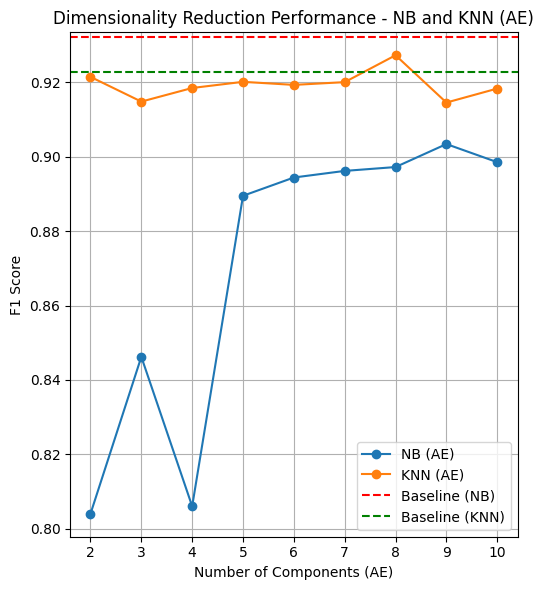

In [ ]:
import matplotlib.pyplot as plt

# Baseline performances
baseline_f1_nb = gnb_f1_score  # F1 score of NB classifier in the baseline
baseline_f1_knn = knn_f1_score  # F1 score of KNN classifier in the baseline

# Plotting
plt.figure(figsize=(10, 6))

# Plot for NB classifier - AE and KNN classifier - AE
plt.subplot(1, 2, 1)
plt.plot(dimension, ae_f1_scores_nb, marker='o', label='NB (AE)')
plt.plot(dimension, ae_f1_scores_knn, marker='o', label='KNN (AE)')
plt.axhline(y=baseline_f1_nb, color='r', linestyle='--', label='Baseline (NB)')
plt.axhline(y=baseline_f1_knn, color='g', linestyle='--', label='Baseline (KNN)')
plt.xlabel('Number of Components (AE)')
plt.ylabel('F1 Score')
plt.title('Dimensionality Reduction Performance - NB and KNN (AE)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

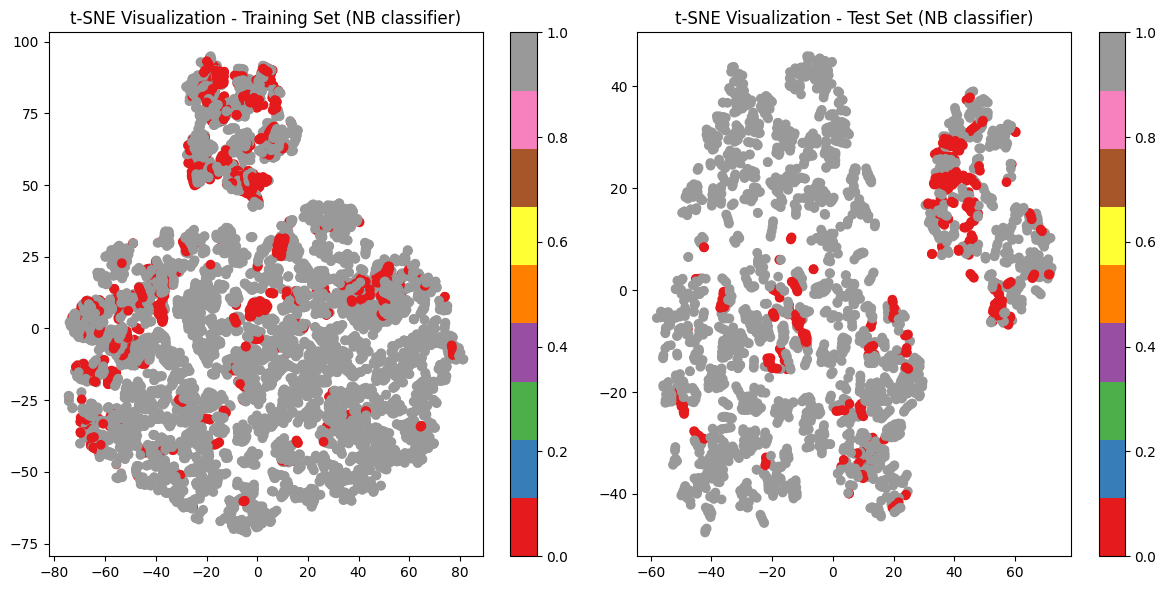

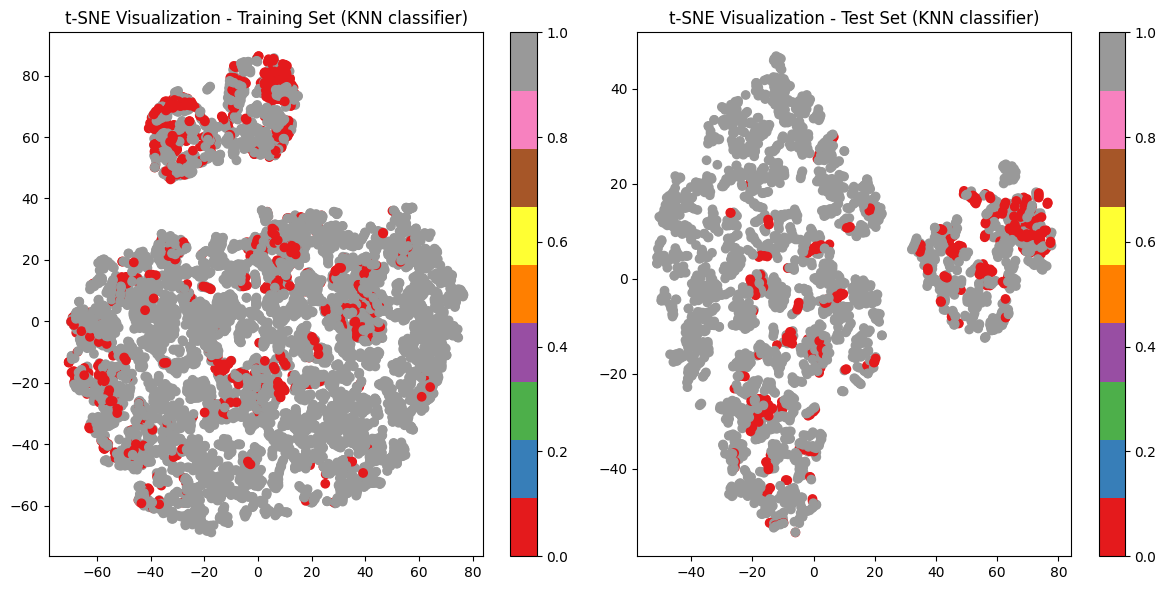

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Perform t-SNE on the best AE dimension for NB classifier
tsne = TSNE(n_components=2, random_state=0)
X_train_tsne_nb = tsne.fit_transform(X_train_best_ae_nb)
X_test_tsne_nb = tsne.fit_transform(X_test_best_ae_nb)

# Plot t-SNE for the training set and test set - NB classifier
plt.figure(figsize=(12, 6))

# Subplot for the training set - NB classifier
plt.subplot(1, 2, 1)
plt.scatter(X_train_tsne_nb[:, 0], X_train_tsne_nb[:, 1], c=y_train, cmap='Set1')
plt.title('t-SNE Visualization - Training Set (NB classifier)')
plt.colorbar()

# Subplot for the test set - NB classifier
plt.subplot(1, 2, 2)
plt.scatter(X_test_tsne_nb[:, 0], X_test_tsne_nb[:, 1], c=y_test, cmap='Set1')
plt.title('t-SNE Visualization - Test Set (NB classifier)')
plt.colorbar()

plt.tight_layout()
plt.show()

# Perform t-SNE on the best AE dimension for KNN classifier
X_train_tsne_knn = tsne.fit_transform(X_train_best_ae_knn)
X_test_tsne_knn = tsne.fit_transform(X_test_best_ae_knn)

# Plot t-SNE for the training set and test set - KNN classifier
plt.figure(figsize=(12, 6))

# Subplot for the training set - KNN classifier
plt.subplot(1, 2, 1)
plt.scatter(X_train_tsne_knn[:, 0], X_train_tsne_knn[:, 1], c=y_train, cmap='Set1')
plt.title('t-SNE Visualization - Training Set (KNN classifier)')
plt.colorbar()

# Subplot for the test set - KNN classifier
plt.subplot(1, 2, 2)
plt.scatter(X_test_tsne_knn[:, 0], X_test_tsne_knn[:, 1], c=y_test, cmap='Set1')
plt.title('t-SNE Visualization - Test Set (KNN classifier)')
plt.colorbar()

plt.tight_layout()
plt.show()


In [ ]:
if best_f1_score_nb > best_f1_score_knn:
    best_model = "Naive Bayes (NB)"
    best_f1_score = best_f1_score_nb
    best_dimensionality_reduction = "PCA"
    best_dimension = best_dimension_nb
else:
    best_model = "K-Nearest Neighbors (KNN)"
    best_f1_score = best_f1_score_knn
    best_dimensionality_reduction = "Autoencoders"
    best_dimension = best_dim_knn

# Print the best model based on its F1 score
print("Best Model based on F1 score:")
print(f"Model: {best_model}")
print(f"F1 Score: {best_f1_score}")

# Print the dimensionality reduction technique used in the best model
print("Dimensionality Reduction Technique:")
print(f"Technique: {best_dimensionality_reduction}")
print(f"Dimension: {best_dimension}")


Best Model based on F1 score:
Model: K-Nearest Neighbors (KNN)
F1 Score: 0.9273182957393483
Dimensionality Reduction Technique:
Technique: Autoencoders
Dimension: 8


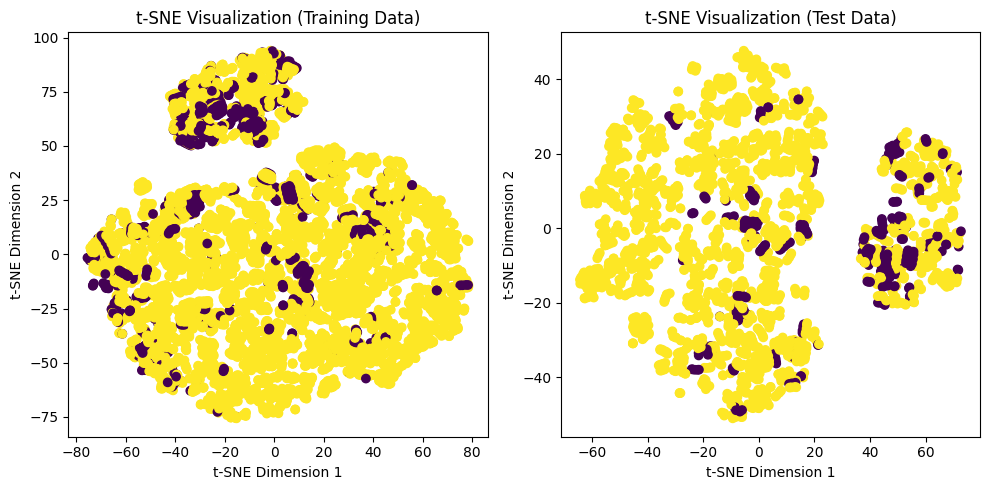

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Perform t-SNE on the training data
tsne = TSNE(n_components=2, random_state=0)
train_tsne = tsne.fit_transform(train_pca)

# Perform t-SNE on the test data
test_tsne = tsne.fit_transform(test_pca)

# Plot t-SNE visualization for the training data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(train_tsne[:, 0], train_tsne[:, 1], c=y_train)
plt.title("t-SNE Visualization (Training Data)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")

# Plot t-SNE visualization for the test data
plt.subplot(1, 2, 2)
plt.scatter(test_tsne[:, 0], test_tsne[:, 1], c=y_test)
plt.title("t-SNE Visualization (Test Data)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")

plt.tight_layout()
plt.show()

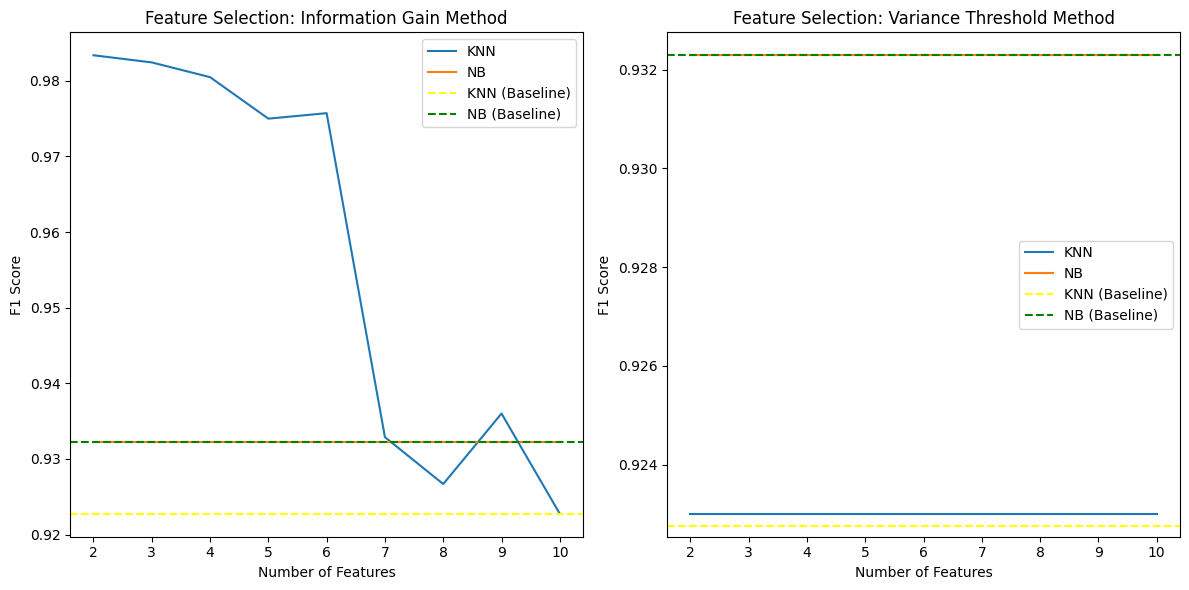

KNN (Information Gain Method):
Best number of features: 2
F1 score: 0.9833684703677676

Naive Bayes (Information Gain Method):
Best number of features: 2
F1 score: 0.9322916666666667

KNN (Variance Threshold Method):
Best number of features: 2
F1 score: 0.9230055658627087

Naive Bayes (Variance Threshold Method):
Best number of features: 2
F1 score: 0.9322916666666667


In [ ]:


# Instantiate the classifiers
models = {"KNN": KNeighborsClassifier(), "NB": GaussianNB()}

# Define the range of feature numbers
min_features = 2
max_features = min(x_train.shape[1], 64)  # Adjusted to the maximum number of available features

# Dictionary to store the number of features and f1 scores
f1_dict_info_gain = {}
f1_dict_variance_threshold = {}

# Iterate over different numbers of features
for nf in range(min_features, max_features + 1):
    # Select the top N features using information gain method
    fsm = SelectKBest(mutual_info_classif, k=nf)
    X_train_selected_info_gain = fsm.fit_transform(x_train, y_train)
    X_test_selected_info_gain = fsm.transform(x_test)

    # Select the top N features using variance threshold
    selector = VarianceThreshold(threshold=0.1)
    X_train_selected_variance_threshold = selector.fit_transform(x_train)
    X_test_selected_variance_threshold = selector.transform(x_test)

    for model_name, model in models.items():
        # Train the classifier using the selected features (information gain)
        model.fit(X_train_selected_info_gain, y_train)
        y_pred_info_gain = model.predict(X_test_selected_info_gain)
        f1_info_gain = f1_score(y_test, y_pred_info_gain)
        f1_dict_info_gain[(nf, model_name)] = f1_info_gain

        # Train the classifier using the selected features (variance threshold)
        model.fit(X_train_selected_variance_threshold, y_train)
        y_pred_variance_threshold = model.predict(X_test_selected_variance_threshold)
        f1_variance_threshold = f1_score(y_test, y_pred_variance_threshold)
        f1_dict_variance_threshold[(nf, model_name)] = f1_variance_threshold

# Get the baseline f1 scores without feature selection
baseline_f1_scores = {}
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    f1 = f1_score(y_test, y_pred)
    baseline_f1_scores[model_name] = f1

# Define the baseline colors for each model
baseline_colors = {"KNN": "yellow", "NB": "green"}

# Create subplots for the two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the number of features versus f1 score for each model (information gain)
for model_name in models.keys():
    f1_values_info_gain = [f1_dict_info_gain[(nf, model_name)] for nf in range(min_features, max_features + 1)]
    ax1.plot(range(min_features, max_features + 1), f1_values_info_gain, label=model_name)

# Plot the baseline f1 scores with corresponding colors (information gain)
for model_name, f1 in baseline_f1_scores.items():
    ax1.axhline(y=f1, linestyle='--', label=model_name + " (Baseline)", color=baseline_colors[model_name])

# Set labels and title for the information gain plot
ax1.set_xlabel("Number of Features")
ax1.set_ylabel("F1 Score")
ax1.set_title("Feature Selection: Information Gain Method")
ax1.legend()

# Plot the number of features versus f1 score for each model (variance threshold)
for model_name in models.keys():
    f1_values_variance_threshold = [f1_dict_variance_threshold[(nf, model_name)] for nf in range(min_features, max_features + 1)]
    ax2.plot(range(min_features, max_features + 1), f1_values_variance_threshold, label=model_name)

# Plot the baseline f1 scores with corresponding colors (variance threshold)
for model_name, f1 in baseline_f1_scores.items():
    ax2.axhline(y=f1, linestyle='--', label=model_name + " (Baseline)", color=baseline_colors[model_name])

# Set labels and title for the variance threshold plot
ax2.set_xlabel("Number of Features")
ax2.set_ylabel("F1 Score")
ax2.set_title("Feature Selection: Variance Threshold Method")
ax2.legend()

# Adjust the spacing between subplots
fig.tight_layout()

# Display the plots
plt.show()

# Find the best number of features and F1 score for KNN (information gain)
best_num_features_knn_info_gain, best_f1_score_knn_info_gain = max(f1_dict_info_gain.items(), key=lambda x: x[1])[0]
f1_score_knn_info_gain = f1_dict_info_gain[(best_num_features_knn_info_gain, "KNN")]

# Find the best number of features and F1 score for Naive Bayes (information gain)
best_num_features_nb_info_gain, best_f1_score_nb_info_gain = max(f1_dict_info_gain.items(), key=lambda x: x[1])[0]
f1_score_nb_info_gain = f1_dict_info_gain[(best_num_features_nb_info_gain, "NB")]

# Find the best number of features and F1 score for KNN (variance threshold)
best_num_features_knn_variance_threshold, best_f1_score_knn_variance_threshold = max(f1_dict_variance_threshold.items(), key=lambda x: x[1])[0]
f1_score_knn_variance_threshold = f1_dict_variance_threshold[(best_num_features_knn_variance_threshold, "KNN")]

# Find the best number of features and F1 score for Naive Bayes (variance threshold)
best_num_features_nb_variance_threshold, best_f1_score_nb_variance_threshold = max(f1_dict_variance_threshold.items(), key=lambda x: x[1])[0]
f1_score_nb_variance_threshold = f1_dict_variance_threshold[(best_num_features_nb_variance_threshold, "NB")]

print("KNN (Information Gain Method):")
print("Best number of features:", best_num_features_knn_info_gain)
print("F1 score:", f1_score_knn_info_gain)

print("\nNaive Bayes (Information Gain Method):")
print("Best number of features:", best_num_features_nb_info_gain)
print("F1 score:", f1_score_nb_info_gain)

print("\nKNN (Variance Threshold Method):")
print("Best number of features:", best_num_features_knn_variance_threshold)
print("F1 score:", f1_score_knn_variance_threshold)

print("\nNaive Bayes (Variance Threshold Method):")
print("Best number of features:", best_num_features_nb_variance_threshold)
print("F1 score:", f1_score_nb_variance_threshold)






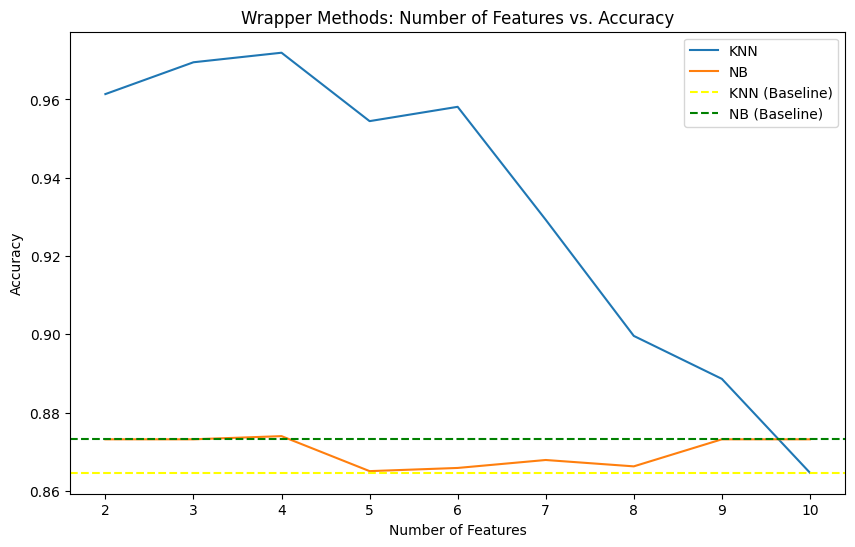

Best number of features: 4
Best model: KNN
Maximum accuracy: 0.9719512195121951


In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Instantiate the classifiers
models = {"KNN": KNeighborsClassifier(), "NB": GaussianNB()}

# Dictionary to store the number of features and accuracy scores
acc_dict_wrapper = {}

# Iterate over different numbers of features
for nf in range(min_features, max_features + 1):
    for model_name, model in models.items():
        # Create the SequentialFeatureSelector
        selector = SequentialFeatureSelector(estimator=model, n_features_to_select=nf / x_train.shape[1], direction='forward')

        # Fit the selector on the training data
        selector.fit(x_train, y_train)

        # Transform the training and test data to the selected features
        x_train_selected2 = selector.transform(x_train)
        x_test_selected2 = selector.transform(x_test)

        # Train the classifier using the selected features
        model.fit(x_train_selected2, y_train)

        # Make predictions on the test set
        y_pred = model.predict(x_test_selected2)

        # Calculate the accuracy score
        accuracy = accuracy_score(y_test, y_pred)
        acc_dict_wrapper[(nf, model_name)] = accuracy

# Get the baseline accuracy scores without feature selection
baseline_accuracy_scores = {}
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    baseline_accuracy_scores[model_name] = accuracy
# Define the baseline colors for each model
baseline_colors = {"KNN": "yellow", "NB": "green"}
# Plot the number of features versus accuracy for each model using wrapper method
plt.figure(figsize=(10, 6))
for model_name in models.keys():
    accuracy_values_wrapper = [acc_dict_wrapper[(nf, model_name)] for nf in range(min_features, max_features + 1)]
    plt.plot(range(min_features, max_features + 1), accuracy_values_wrapper, label=model_name)

# Plot the baseline accuracy scores
for model_name, accuracy in baseline_accuracy_scores.items():
    plt.axhline(y=accuracy, color=baseline_colors[model_name], linestyle='--', label=model_name + " (Baseline)")

plt.xlabel("Number of Features")
plt.ylabel("Accuracy")
plt.title("Wrapper Methods: Number of Features vs. Accuracy")
plt.legend()
plt.show()

# Find the best number of features and model with the maximum accuracy
best_num_features, best_model_name = max(acc_dict_wrapper, key=acc_dict_wrapper.get)
best_accuracy = acc_dict_wrapper[(best_num_features, best_model_name)]
print("Best number of features:", best_num_features)
print("Best model:", best_model_name)
print("Maximum accuracy:", best_accuracy)


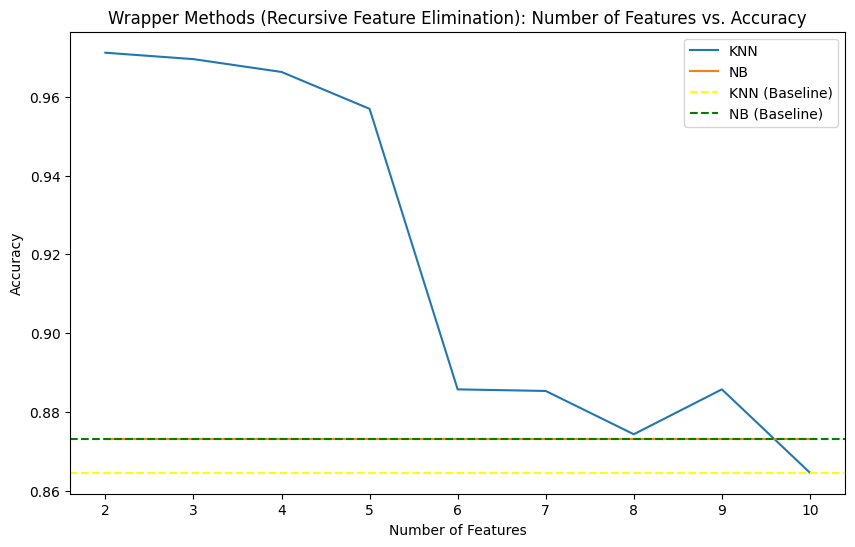

Best number of features: 2
Best model: KNN
Maximum accuracy: 0.9711382113821139


In [ ]:

# Instantiate the classifier
rf = RandomForestClassifier()
models = {"KNN": KNeighborsClassifier(), "NB": GaussianNB()}
# Dictionary to store the number of features and accuracy scores
acc_dict_wrapper = {}

# Iterate over different numbers of features
for nf in range(min_features, max_features + 1):
    # Create the RFE object
    selector = RFE(estimator=rf, n_features_to_select=nf)

    # Fit the selector on the training data
    selector.fit(x_train, y_train)

    # Transform the training and test data to the selected features
    x_train_selected3 = selector.transform(x_train)
    x_test_selected3 = selector.transform(x_test)

    for model_name, model in models.items():
        # Train the classifier using the selected features
        model.fit(x_train_selected3, y_train)

        # Make predictions on the test set
        y_pred = model.predict(x_test_selected3)

        # Calculate the accuracy score
        accuracy = accuracy_score(y_test, y_pred)
        acc_dict_wrapper[(nf, model_name)] = accuracy

# Get the baseline accuracy scores without feature selection
baseline_accuracy_scores = {}
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    baseline_accuracy_scores[model_name] = accuracy

# Define the baseline colors for each model
baseline_colors = {"KNN": "yellow", "NB": "green"}

# Plot the number of features versus accuracy for each model using wrapper method
plt.figure(figsize=(10, 6))
for model_name in models.keys():
    accuracy_values_wrapper = [acc_dict_wrapper[(nf, model_name)] for nf in range(min_features, max_features + 1)]
    plt.plot(range(min_features, max_features + 1), accuracy_values_wrapper, label=model_name)

# Plot the baseline accuracy scores
for model_name, accuracy in baseline_accuracy_scores.items():
    plt.axhline(y=accuracy, color=baseline_colors[model_name], linestyle='--', label=model_name + " (Baseline)")

plt.xlabel("Number of Features")
plt.ylabel("Accuracy")
plt.title("Wrapper Methods (Recursive Feature Elimination): Number of Features vs. Accuracy")

plt.legend()
plt.show()

# Find the best number of features and model with the maximum accuracy
best_num_features, best_model_name = max(acc_dict_wrapper, key=acc_dict_wrapper.get)
best_accuracy = acc_dict_wrapper[(best_num_features, best_model_name)]
print("Best number of features:", best_num_features)
print("Best model:", best_model_name)
print("Maximum accuracy:", best_accuracy)


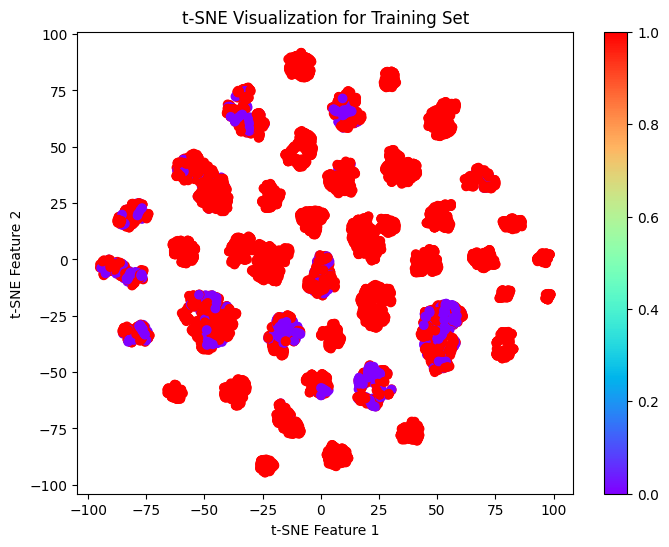

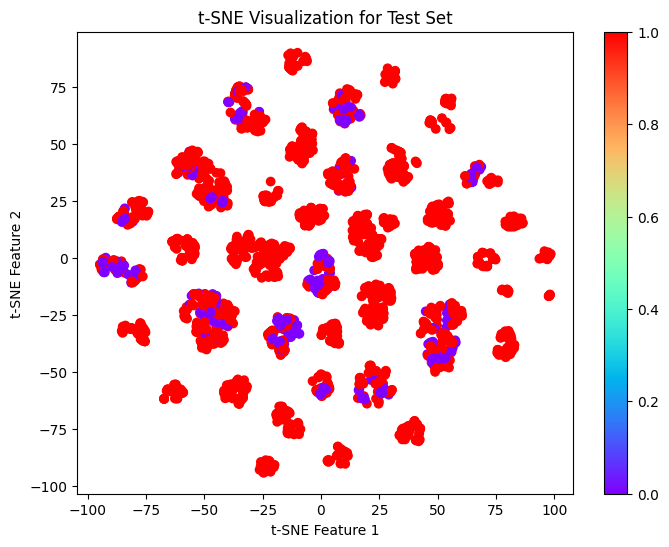

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Instantiate the classifiers
models = {"KNN": KNeighborsClassifier(), "NB": GaussianNB()}

# Define the range of feature numbers
min_features = 2
max_features = min(x_train.shape[1], 64)  # Adjusted to the maximum number of available features

# Dictionary to store the number of features and accuracy scores
acc_dict = {}

# Iterate over different numbers of features
for nf in range(min_features, max_features + 1):
    for model_name, model in models.items():
        # Apply the best method (filter or wrapper) to select features


        # Train the classifier using the selected features
        model.fit(X_train_selected_info_gain, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test_selected_info_gain)

        # Calculate the accuracy score
        accuracy = accuracy_score(y_test, y_pred)
        acc_dict[(nf, model_name)] = accuracy

# Get the best number of features and model with the maximum accuracy
best_num_features, best_model_name = max(acc_dict, key=acc_dict.get)

# Select the best features based on the best number of features using the best method
# Replace this section with the code from the best method you have chosen

# Combine the training set and test set
combined_features = np.concatenate((X_train_selected_info_gain, X_test_selected_info_gain))
combined_labels = np.concatenate((y_train, y_test))

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
tsne_features = tsne.fit_transform(combined_features)

# Separate the transformed features into training and test sets
tsne_train_features = tsne_features[:len(X_train_selected_info_gain)]
tsne_test_features = tsne_features[len(X_train_selected_info_gain):]

# Plot the t-SNE visualization for the training set
plt.figure(figsize=(8, 6))
plt.scatter(tsne_train_features[:, 0], tsne_train_features[:, 1], c=y_train, cmap='rainbow')
plt.title("t-SNE Visualization for Training Set")
plt.xlabel("t-SNE Feature 1")
plt.ylabel("t-SNE Feature 2")
plt.colorbar()
plt.show()

# Plot the t-SNE visualization for the test set
plt.figure(figsize=(8, 6))
plt.scatter(tsne_test_features[:, 0], tsne_test_features[:, 1], c=y_test, cmap='rainbow')
plt.title("t-SNE Visualization for Test Set")
plt.xlabel("t-SNE Feature 1")
plt.ylabel("t-SNE Feature 2")
plt.colorbar()
plt.show()


In [ ]:
import numpy as np

def unsupervisedLabelMap(cluster_labels, legitimacy_labels):
    unique_clusters = np.unique(cluster_labels)
    label_map = {}
    sum=0
    for cluster_label in unique_clusters:
        cluster_indices = np.where(cluster_labels == cluster_label)[0]
        cluster_legitimacy_labels = legitimacy_labels[cluster_indices]
        if 0 in cluster_legitimacy_labels:
            label_map[cluster_label] = 0
        else:
            label_map[cluster_label] = 1
            sum=sum+len(cluster_indices)
    return sum

cluster_labels = np.array([1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 4, 4, 4, 4,9,9,9,9,9,9,9,9,9,9,9,9,9,9])
legitimacy_labels = np.array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,1,1,1,1,1,1,1,1,1,1,1,1,1,1])

sum = unsupervisedLabelMap(cluster_labels, legitimacy_labels)

print(sum)

14


In [ ]:
x_train=train_data[['Latitude', 'Longitude']]
y_train=train_data['Ligitimacy']
x_test=test_data[['Latitude', 'Longitude']]
y_test=test_data['Ligitimacy']

for cluster = 8 = [1573]
for cluster = 12 = [1573, 2679]
for cluster = 16 = [1573, 2679, 3420]
for cluster = 20 = [1573, 2679, 3420, 3965]
for cluster = 32 = [1573, 2679, 3420, 3965, 4740]


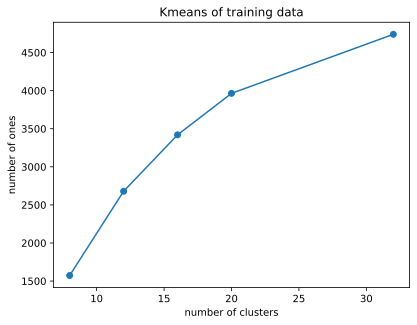

In [ ]:

sum1=[]
# Define the number of clusters to test
cluster_sizes = [8, 12, 16, 20, 32]

# Initialize a list to store the total number of legitimate-only members
ligitimate_members = []

# Perform K-means clustering for each cluster size
for n_clusters in cluster_sizes:
    # Create the K-means object
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)

    # Fit the K-means model to the data
    kmeans.fit(x_train)
    kmeans.predict(x_train)

    # Get the cluster labels
    labels = kmeans.labels_
    Sum=unsupervisedLabelMap(labels, y_train.values)
    sum1.append(Sum)
    print('for cluster = {} = {}'.format(n_clusters, sum1))

plt.plot(cluster_sizes, sum1, marker='o')
plt.xlabel('number of clusters')
plt.ylabel('number of ones')
plt.title('Kmeans of training data')
plt.show()

for cluster = 8 = [497]
for cluster = 12 = [497, 978]
for cluster = 16 = [497, 978, 1179]
for cluster = 20 = [497, 978, 1179, 1376]
for cluster = 32 = [497, 978, 1179, 1376, 1713]


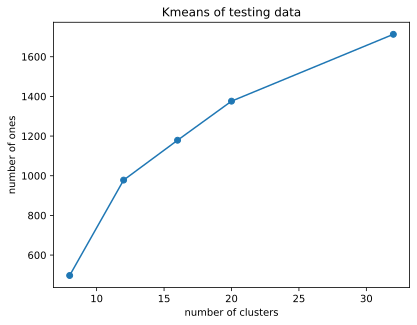

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
sum1=[]
# Define the number of clusters to test
cluster_sizes = [8, 12, 16, 20, 32]

# Initialize a list to store the total number of legitimate-only members
ligitimate_members = []

# Perform K-means clustering for each cluster size
for n_clusters in cluster_sizes:
    # Create the K-means object
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)

    # Fit the K-means model to the data
    kmeans.fit(x_test)
    kmeans.predict(x_test)

    # Get the cluster labels
    labels = kmeans.labels_
    Sum=unsupervisedLabelMap(labels, y_test.values)
    sum1.append(Sum)
    print('for cluster = {} = {}'.format(n_clusters, sum1))
plt.plot(cluster_sizes, sum1, marker='o')
plt.xlabel('number of clusters')
plt.ylabel('number of ones')
plt.title('Kmeans of testing data')
plt.show()

For cluster = 8: 1274
For cluster = 12: 2516
For cluster = 16: 3184
For cluster = 20: 2616
For cluster = 32: 3781


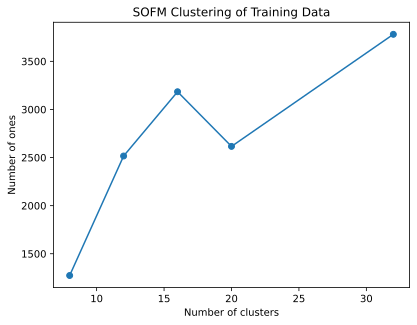

In [ ]:

sum1 = []
cluster_sizes = [8, 12, 16, 20, 32]

for n_clusters in cluster_sizes:
    # Create the SOM object
    som = MiniSom(n_clusters, 1, len(x_train[0]), sigma=0.3, learning_rate=0.5)

    # Initialize weights and train the SOM
    som.random_weights_init(x_train)
    som.train_random(x_train, 100)

    # Assign each sample to its nearest cluster
    labels = np.array([som.winner(x)[0] for x in x_train])

    # Calculate the total number of legitimate-only members
    Sum = unsupervisedLabelMap(labels, y_train.values)
    sum1.append(Sum)
    print('For cluster = {}: {}'.format(n_clusters, Sum))
plt.plot(cluster_sizes, sum1, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Number of ones')
plt.title('SOFM Clustering of Training Data')
plt.show()



For cluster = 8: 170
For cluster = 12: 674
For cluster = 16: 606
For cluster = 20: 647
For cluster = 32: 1434


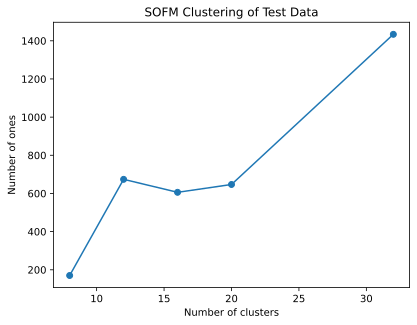

In [ ]:

sum1_test = []
cluster_sizes = [8, 12, 16, 20, 32]

# Normalize the data
scaler = MinMaxScaler()
x_test_normalized = scaler.fit_transform(x_test)

# Perform SOM clustering on x_test and y_test
for n_clusters in cluster_sizes:
    # Create the SOM object
    som = MiniSom(n_clusters, 1, len(x_test_normalized[0]), sigma=0.3, learning_rate=0.5, random_seed=42)

    # Initialize weights and train the SOM
    som.random_weights_init(x_test_normalized)
    som.train_random(x_test_normalized, 100)

    # Assign each sample in x_test_normalized to its nearest cluster
    labels_test = np.array([som.winner(x)[0] for x in x_test_normalized])

    # Calculate the total number of legitimate-only members for x_test
    sum_test = unsupervisedLabelMap(labels_test, y_test.values)
    sum1_test.append(sum_test)
    print('For cluster = {}: {}'.format(n_clusters, sum_test))

# Plotting the results for the test dataset
plt.plot(cluster_sizes, sum1_test, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Number of ones')
plt.title('SOFM Clustering of Test Data')
plt.show()


For cluster = 8: 6072
For cluster = 12: 6103
For cluster = 16: 6134
For cluster = 20: 6138
For cluster = 32: 6141


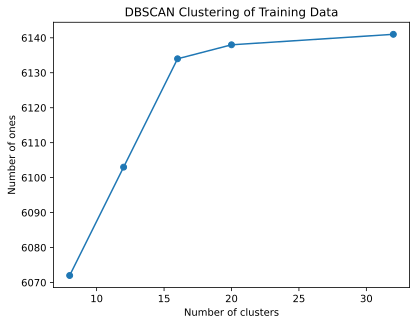

In [ ]:

sum1 = []
cluster_sizes = [8, 12, 16, 20, 32]

for n_clusters in cluster_sizes:
    # Create the DBSCAN object
    dbscan = DBSCAN(eps=0.003, min_samples=n_clusters)

    predLabels = dbscan.fit_predict(x_train)
    labels = dbscan.labels_

    # Calculate the total number of legitimate-only members
    Sum = unsupervisedLabelMap(labels, y_train.values)
    sum1.append(Sum)
    print('For cluster = {}: {}'.format(n_clusters, Sum))

plt.plot(cluster_sizes, sum1, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Number of ones')
plt.title('DBSCAN Clustering of Training Data')
plt.show()






For cluster = 8: 2084
For cluster = 12: 2088
For cluster = 16: 50
For cluster = 20: 0
For cluster = 32: 0


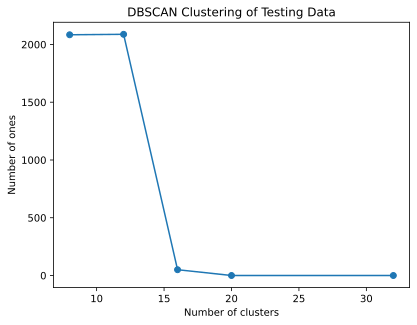

In [ ]:
sum1_test = []

for n_clusters in cluster_sizes:
    # Create the DBSCAN object
    dbscan = DBSCAN(eps=0.003, min_samples=n_clusters)

    predLabels_test = dbscan.fit_predict(x_test)
    labels_test = dbscan.labels_

    # Calculate the total number of legitimate-only members
    Sum_test = unsupervisedLabelMap(labels_test, y_test.values)  # Assuming you have defined y_test
    sum1_test.append(Sum_test)
    print('For cluster = {}: {}'.format(n_clusters, Sum_test))

plt.plot(cluster_sizes, sum1_test, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Number of ones')
plt.title('DBSCAN Clustering of Testing Data')
plt.show()